# __Incremental Capstone - Week 7__

__Task:  Cluster the credit card users into different groups to find meaningful patterns. Use Principal Component Analysis (PCA) to reduce the dimension of the feature space and then use the K-means algorithm to find clusters.__

1. Load dataset (CC GENERAL.csv, the name of the file when downloaded from Kaggle.) 
2. Check for null values and handle those values.
3. Perform feature scaling using StandardScaler
4. Perform PCA with all the columns and plot number of components vs PCA cumulative explained variance. From the plot identify the number of components required to cover 85% of the variance.
5. Perform PCA with 2 principal components with the aim of visualizing clustering.
- Find the 2 columns which give the most covariances. 
- Interpret the results of PCA by looking at the covariance matrix (use get_covariance() method of PCA).
6. Perform K Means Clustering on the 2 component PCA transformed data with clusters ranging from 2 to 11 and plot the K Means inertia against the number of clusters. (Elbow Method). From the elbow plot identify the ideal required number of clusters.
7. Perform K Means Clustering on the 2 component PCA transformed data with the ideal number of clusters found in the previous step.
8. Visualize the clusters on a scatter plot between 1st PCA and 2nd PCA components giving different colors to each cluster.

__1. Load dataset (CC GENERAL.csv, the name of the file when downloaded from Kaggle.)__

In [24]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns

In [25]:
ccData = pd.read_csv("./data/credit_card_dataset.csv")
print ( "Rows :" , ccData. shape [0])
print ( "Columns : ", ccData. shape [ 1])
ccData.head()

Rows : 8950
Columns :  18


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [26]:
ccData = ccData.drop("CUST_ID",axis=1)

In [27]:
ccData.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


__2. Check for null values and handle those values.__

In [28]:
ccData.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We see that there is one NULL va lue for CREDIT_LIMIT and 313 NULL va lues for MINIMUM_PAYMENTS. Before we fill in the NULL va lues, we need to understand what these attributes are doing.
- When MINIMUM_PAYMENTS is null, it is safe to assume that no minimum payment was made. This means we can convert all the NULL va lues in MINIMUM_PAYMENTS to 0.
- When MINIMUM_PAYMENTS is NULL, the most ra t ional assumption is that there is no credit limit for that particular customer. Once again, we can set it to 0.

In [29]:
ccData['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

<Axes: >

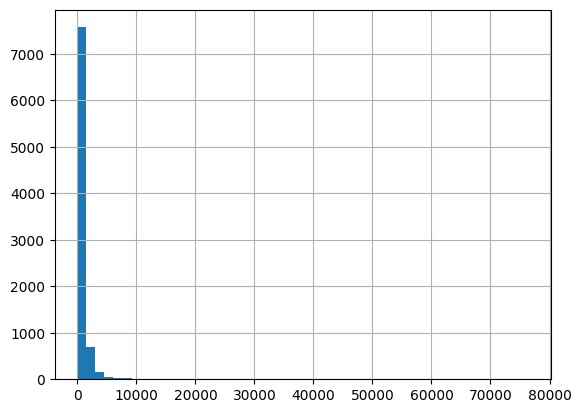

In [30]:
ccData['MINIMUM_PAYMENTS'].hist(bins=50)

In [31]:
ccData = ccData.fillna(0)

In [32]:
ccData.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


__3. Perform feature scaling using StandardScaler__

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_ccData = scaler.fit_transform(ccData)

__4. Perform PCA with all the columns and plot number of components vs PCA cumulative explained variance. From the plot identify the number of components required to cover 85% of the variance.__

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA()
pca.fit(scaled_ccData)

PCA()

In [36]:
# Show eigenvalues
pca.explained_variance_, pca.explained_variance_ratio_, pca.components_

(array([4.64190614e+00, 3.45475337e+00, 1.50045394e+00, 1.27160997e+00,
        1.05483128e+00, 9.74976728e-01, 8.29804948e-01, 7.35105664e-01,
        6.42621922e-01, 5.23650954e-01, 4.03359390e-01, 3.01502083e-01,
        2.42906861e-01, 2.06856603e-01, 1.72146436e-01, 4.54017087e-02,
        1.16501890e-05]),
 array([2.73022794e-01, 2.03198080e-01, 8.82521348e-02, 7.47922291e-02,
        6.20419660e-02, 5.73451642e-02, 4.88066019e-02, 4.32366782e-02,
        3.77970659e-02, 3.07995556e-02, 2.37243719e-02, 1.77334350e-02,
        1.42870424e-02, 1.21666759e-02, 1.01251295e-02, 2.67039035e-03,
        6.85228665e-07]),
 array([[ 1.02098382e-01,  1.20759369e-01,  4.11510241e-01,
          3.46286934e-01,  3.36724327e-01, -2.25116766e-02,
          3.21087301e-01,  2.94413485e-01,  2.74373318e-01,
         -8.82695036e-02, -4.78441908e-02,  3.90538912e-01,
          2.12082436e-01,  2.66607708e-01,  6.48643821e-02,
          1.31681992e-01,  8.11374032e-02],
        [ 4.03730449e-01,  1

In [37]:
np.cumsum(pca.explained_variance_ratio_)

array([0.27302279, 0.47622087, 0.56447301, 0.63926524, 0.7013072 ,
       0.75865237, 0.80745897, 0.85069565, 0.88849271, 0.91929227,
       0.94301664, 0.96075008, 0.97503712, 0.98720379, 0.99732892,
       0.99999931, 1.        ])

Text(0, 0.5, 'cumulative explained variance')

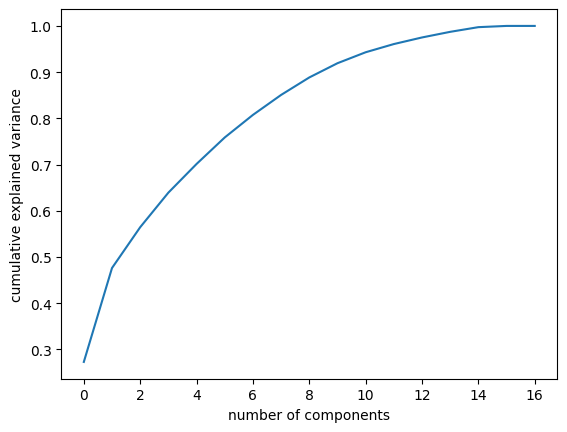

In [38]:
plt.plot (np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Observation: The first 10 principal components explain 91.9% of the variation in data.

The above plot shows us the total explained variance for the number of principal
components we use. For our case, we will use 2 principal components. The first 2
principal components explain **47.6%** of the variation in data. While 4 or 5
components would be ideal in terms of explaining variance, we pick 2 so that we
can visualize the clustering as well.

In [43]:
n_components=8
pca_8 = PCA(n_components=8)
pca_8.fit(scaled_ccData)
pca_8.components_[:2]

array([[ 0.10209838,  0.12075937,  0.41151024,  0.34628693,  0.33672433,
        -0.02251168,  0.3210873 ,  0.29441349,  0.27437332, -0.0882695 ,
        -0.04784419,  0.39053891,  0.21208244,  0.26660771,  0.06486438,
         0.13168199,  0.0811374 ],
       [ 0.40373045,  0.13182495,  0.03945497,  0.06138536, -0.01954414,
         0.43891716, -0.19135121, -0.01890779, -0.17902096,  0.43415662,
         0.41960804, -0.02060454,  0.2376676 ,  0.2562967 ,  0.17011723,
        -0.19007563, -0.00419364]])

__5. Perform PCA with 2 principal components with the aim of visualizing clustering.__
- Find the 2 columns which give the most covariances. 
- Interpret the results of PCA by looking at the covariance matrix (use get_covariance() method of PCA).

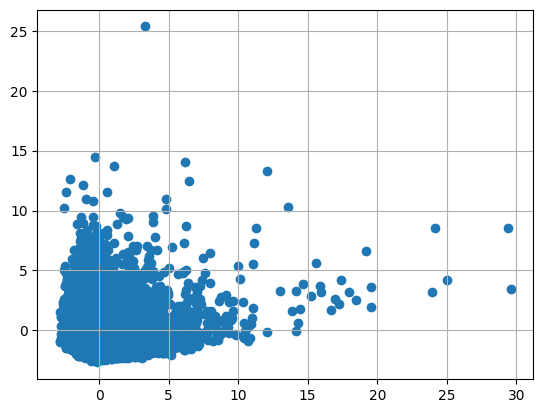

In [45]:
n_components=2
pca_2 = PCA(n_components=2)
pca_2.fit(scaled_ccData)
pca_2.explained_variance_, pca_2.explained_variance_ratio_, pca_2.components_

pca_ccData = pca_2.transform(scaled_ccData)
plt.scatter(pca_ccData[:,0],pca_ccData[:,1])
plt.grid(True)
plt.show()

In [46]:
pca_2.components_[:2]

array([[ 0.10209838,  0.12075937,  0.41151024,  0.34628693,  0.33672433,
        -0.02251168,  0.3210873 ,  0.29441349,  0.27437332, -0.0882695 ,
        -0.04784419,  0.39053891,  0.21208244,  0.26660771,  0.06486438,
         0.13168199,  0.0811374 ],
       [ 0.40373045,  0.13182495,  0.03945497,  0.06138536, -0.01954414,
         0.43891716, -0.19135121, -0.01890779, -0.17902096,  0.43415662,
         0.41960804, -0.02060454,  0.2376676 ,  0.2562967 ,  0.17011723,
        -0.19007563, -0.00419364]])

__Interpret PCA:__

Since the principal components are linear combinations of the attributes, we are basically trying to identify which variables  affect the principal components the most. More specifically, we look at the covariance matrix to see which attribute has the most covariance with the principal component.
1. For the first principal component, the BALANCE column has the most covariance. We could think of the first principal component as being representative of BALANCE. The BALANCE refers to the balance left in the customer's account to make purchases.  
2. For the second principal component, the BALANCE_FREQUENCYcolumn has the most covariance. Loosely speaking, the second principal component is representative of the BALANCE_FREQUENCY. The BALANCE_FREQUENCY tells us how often their customer's balance is updated.

__6. Perform K Means Clustering on the 2 component PCA transformed data with clusters ranging from 2 to 11 and plot the K Means inertia against the number of clusters. (Elbow Method). From the elbow plot identify the ideal required number of clusters.__

In [48]:
from sklearn.cluster import KMeans

In [49]:
sse={}
nclust=np.arange(2,11)
models = []
for i in nclust:
    kmeans = KMeans(n_clusters=i).fit(pca_ccData)
    sse[i] = kmeans.inertia_
    models.append(kmeans)

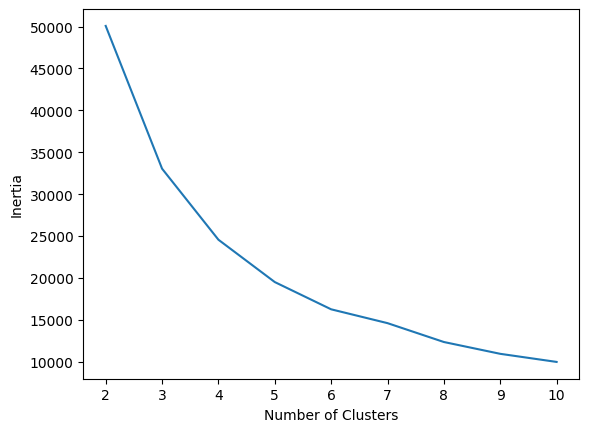

In [50]:
plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

__Summary of Kmeans:__

In the above plot, we are looking for an "elbow." The elbow tells us the point
where increasing the number of variables does not yield a significant decrease in
inertia. The inertia here is referring to within cluster sum of squares. It tells how
compact a given cluster is. From the above plot, 3 clusters seem sufficient.
Although using 10 clusters gives us the least inertia, it will be very difficult to
interpret and may not have significant meaning.

__7. Perform K Means Clustering on the 2 component PCA transformed data with the ideal number of clusters found in the previous step.__

In [ ]:
# Perform K-means with 3 clusters

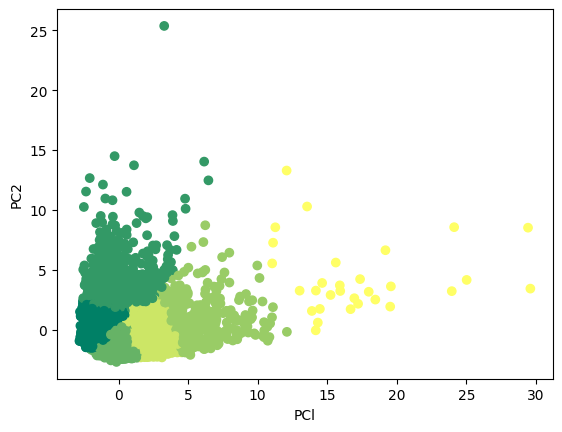

In [55]:
plt.scatter(pca_ccData[:,0],pca_ccData[:,1],
            c=KMeans(n_clusters=6).fit_predict(pca_ccData),
            cmap=plt.cm.summer)
plt.xlabel("PCl")
plt.ylabel("PC2")
plt.show()

__8. Visualize the clusters on a scatter plot between 1st PCA and 2nd PCA components giving different colors to each cluster.__

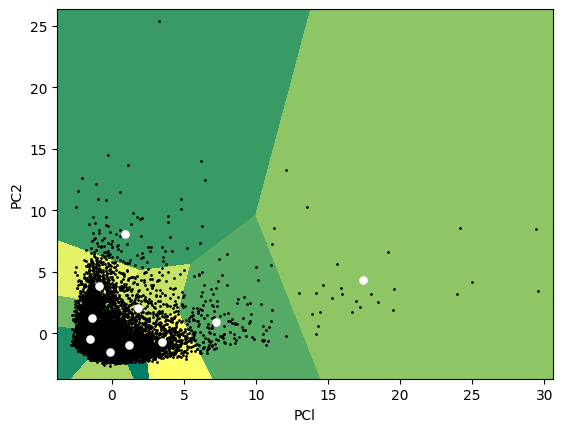

In [56]:
h=.01
x_min,x_max=pca_ccData[:,0].min()-1,pca_ccData[:,0].max()+1
y_min,y_max=pca_ccData[:,1].min()-1,pca_ccData[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z=kmeans.predict(np.array(list(zip(xx.ravel(),yy.ravel()))))
Z=kmeans.predict(np.array(list(zip(xx.ravel(),yy.ravel()))))
Z=Z.reshape(xx.shape)

plt.figure(1)
plt.clf()
plt.imshow(Z,interpolation='nearest',
extent=(xx.min(),xx.max(),yy.min(),yy.max()),
cmap=plt.cm.summer,
aspect='auto',origin='lower')

plt.plot(pca_ccData[:,0],pca_ccData[:,1],'k.',markersize=2)

centroids=kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker='o',s=10,linewidths=3,color='w',zorder=10)

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xlabel("PCl")
plt.ylabel("PC2")
plt.show()

In [57]:
for i in np.arange(len(centroids)):
    print ("Center of Cluster",i+1,":",centroids[i])

Center of Cluster 1 : [ 1.17208688 -0.94669041]
Center of Cluster 2 : [-1.49543729 -0.48344355]
Center of Cluster 3 : [0.91442991 8.09936535]
Center of Cluster 4 : [7.24756669 0.89462265]
Center of Cluster 5 : [-1.39542923  1.28445749]
Center of Cluster 6 : [17.39227888  4.33836   ]
Center of Cluster 7 : [-0.16671272 -1.50943247]
Center of Cluster 8 : [1.78915904 2.06798877]
Center of Cluster 9 : [-0.88145497  3.85011478]
Center of Cluster 10 : [ 3.4462036  -0.73409931]


__Interpretation & Conclusion:__

When we interpret principal components, they are only "loose" interpretations that give us a general idea of how a principal component behaves with regard to important variables. We cannot equate the attributes with the components, but can only explain the behavior of the components.
Keeping that in mind, let us try to make sense of the three clusters:
1. Cluster 1 (Dark Green): The cluster center lies at (0.54, -0.03). From our interpretation of the principal components, this cluster represents customers whose balances are relatively lower and are updated less frequently.
2. Cluster 2 (Light Green): The cluster center lies at (-0.41, -0.3). This cluster represents customers whose balances are relatively higher and are updated more frequently than the customers in Cluster 1.
3. Cluster 3 (Yellow): The cluster center lies at (-0.35, 0.54). This cluster represents customers whose balances are relatively lower - very close to the balances of customers in Cluster 1 - but their balances are updated very frequently. Infact, customers in this cluster have the most frequently updated balances.
